## Adding an album and all of its tracks with Spotipy

Back in the day, when you added an album to your Spotify library, you'd automatically add all of its tracks as well. I don't know when it changed, but it did and it's one of the more annoying issues with Spotify. This notebook will attempt to resolve all that and show how to use Spotipy to add an album and all of its tracks.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

from IPython.display import Image

I will now be using the [Authorization Code Flow](https://spotipy.readthedocs.io/en/2.11.2/#authorization-code-flow) in order to access (my) user data. I followed the details in this [post](https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b) to set up my credentials. Here is some [info](https://developer.spotify.com/documentation/general/guides/app-settings/) on Redirect URIs, which you can specify to be something super-generic like `'https://localhost:8000'` or some such for this sort of exercise.

In [2]:
cid = # your client id
secret =  # your client secret
username= # your username
redirect = # your redirect uri

In passing my credentials, I also need to specify an [Authorization Scope](https://developer.spotify.com/documentation/general/guides/scopes/) which defines what kind of access I have. The `'user-library-modify'` scope allows me to write/delete to/from the user's 'Your Music' library (in this case, my library).

The code below will prompt you to enter whatever URL you are redirected to after clicking through a Spotify page.

In [3]:
scope = 'user-library-modify'
token = util.prompt_for_user_token(username=username,
                                   scope=scope,
                                   client_id=cid,
                                   client_secret=secret,
                                   redirect_uri=redirect)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

Now I'll search for the recently released album [The Loves of Your Life](https://pitchfork.com/reviews/albums/hamilton-leithauser-the-loves-of-your-life/) by [Hamilton Leithuaser](https://pitchfork.com/artists/7485-hamilton-leithauser/), and get its URI.

In [9]:
album_search = sp.search('hamilton leithauer loves of your life', type='album')
leithauser_uri = album_search['albums']['items'][0]['uri']
leithauser_uri

'spotify:album:4kBc87iwT7HAqZx8A0aC1f'

Here's what a view of this album on Spotify Desktop looks like for me prior to adding both the album and its tracks (note the unfilled heart):

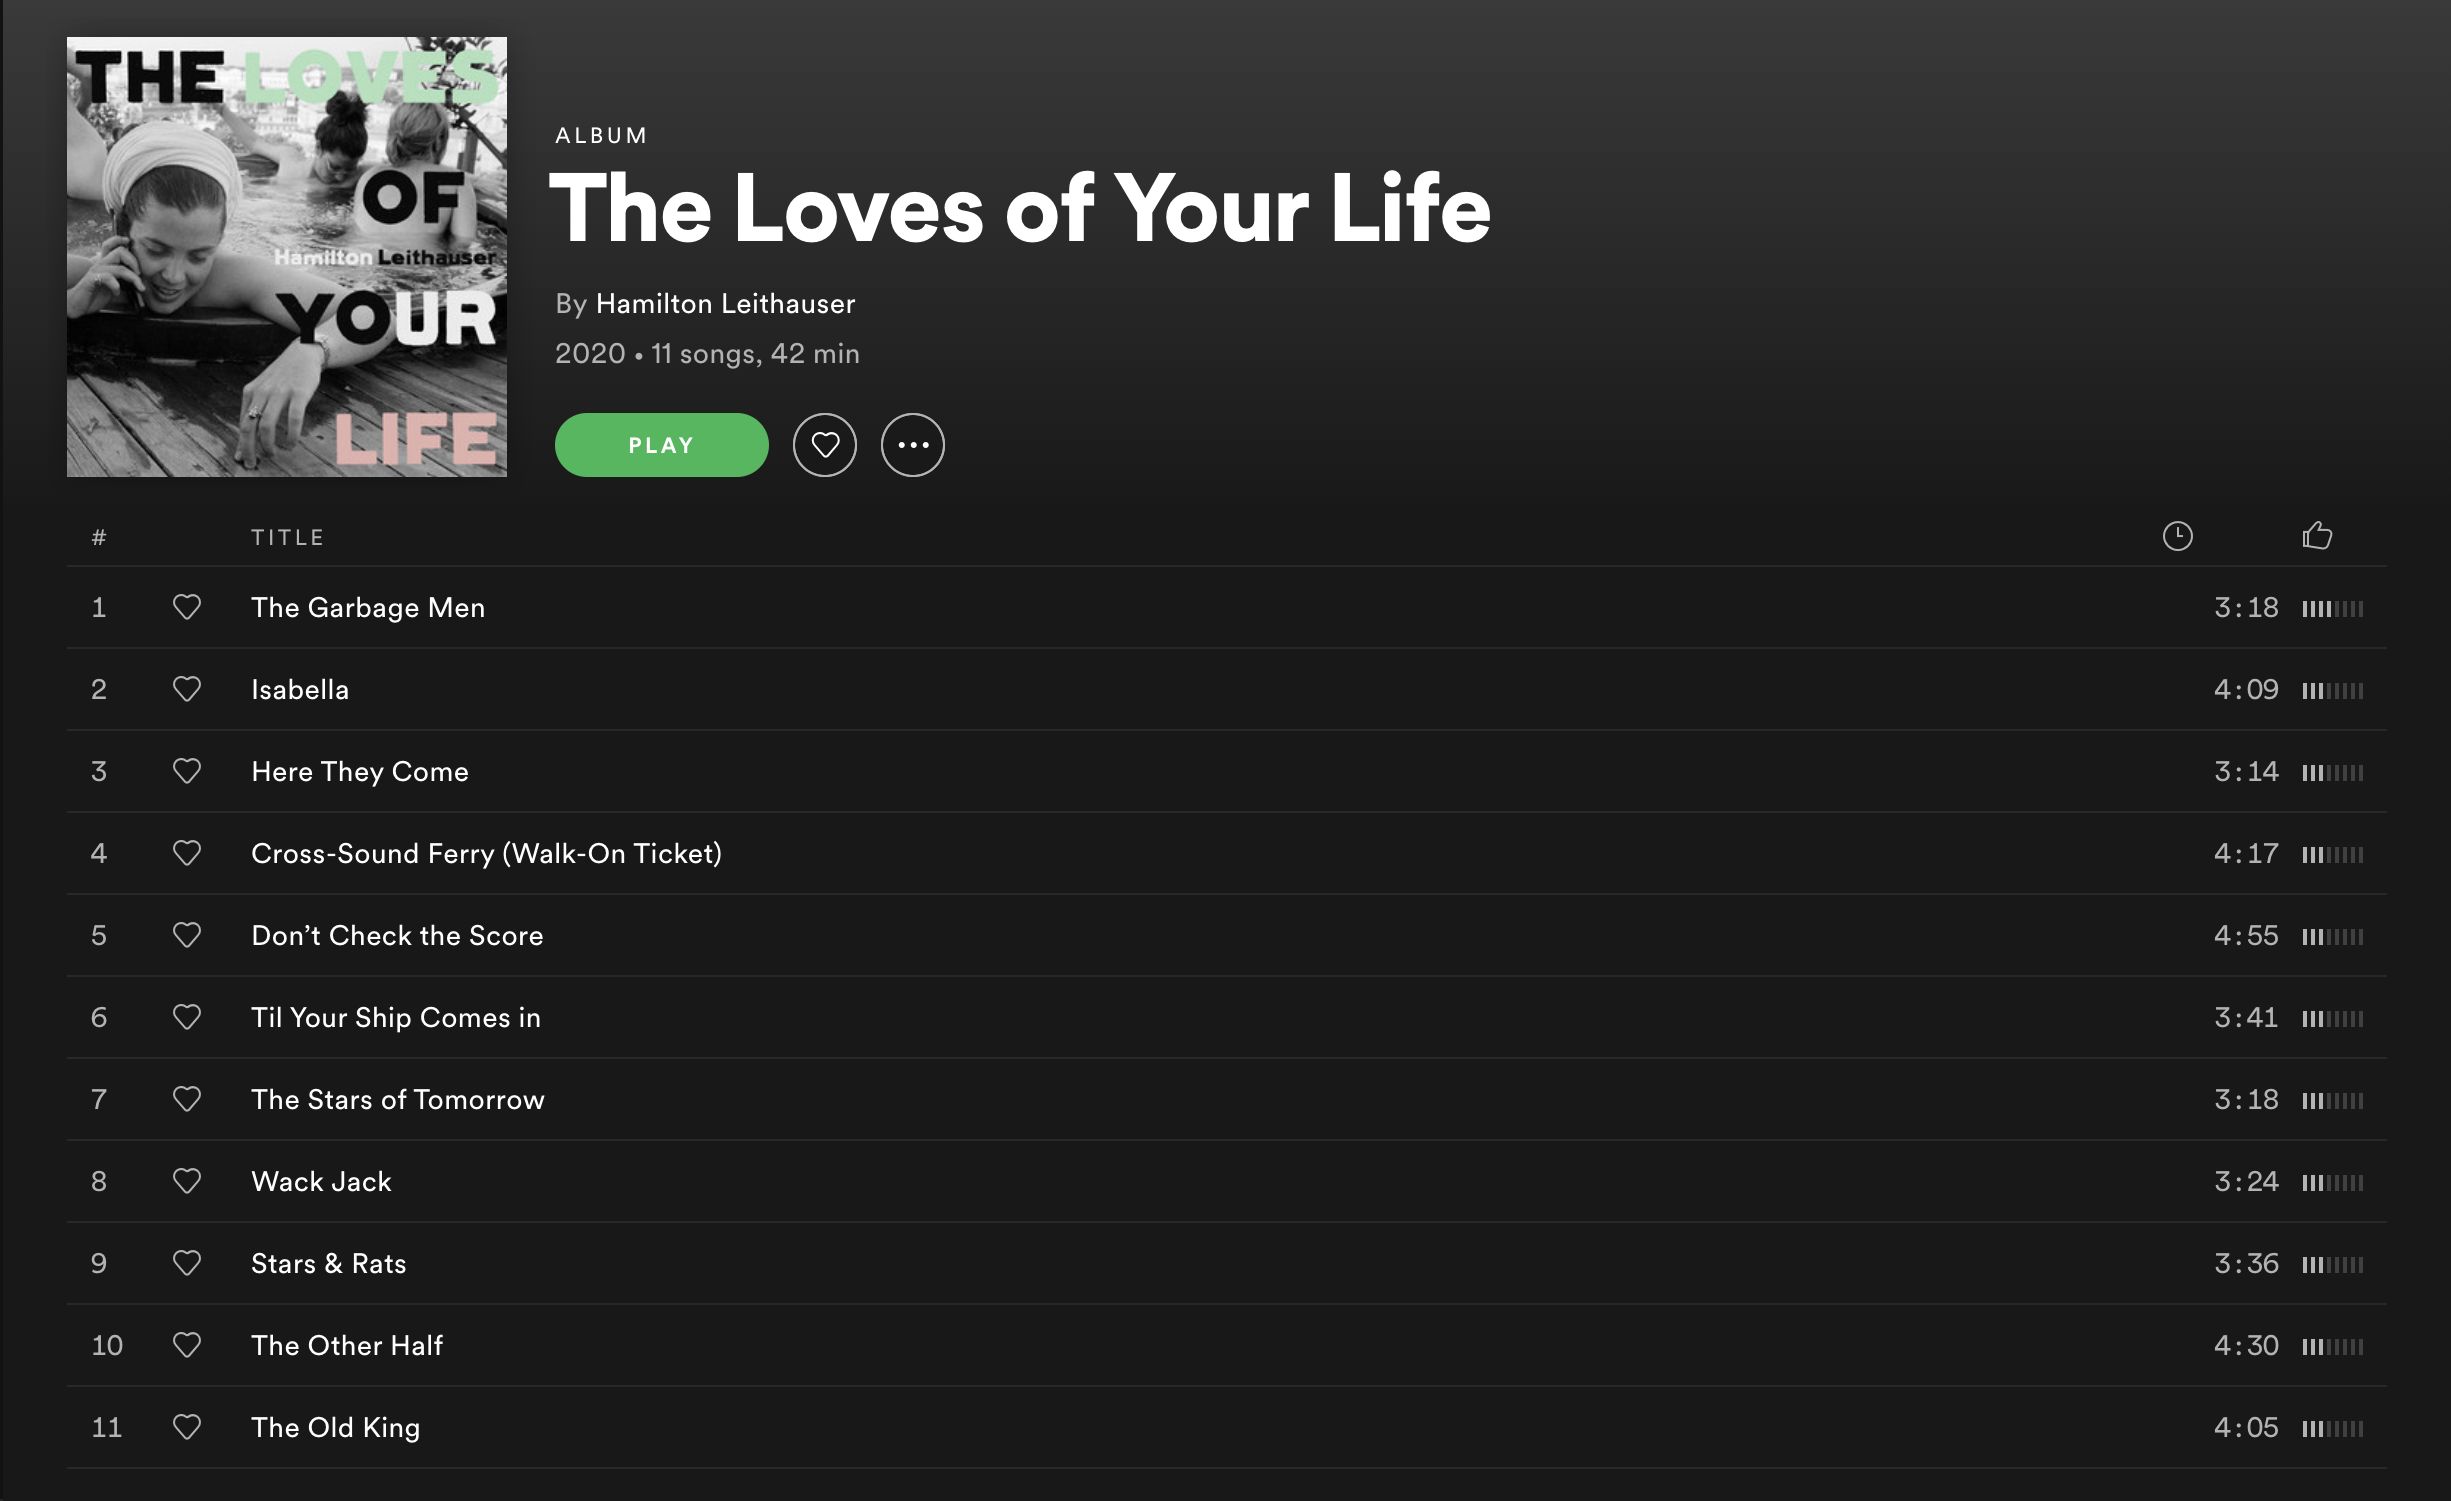

In [13]:
Image('Before_Add_Album.PNG') 

Now let's add this to my 'Your Music' library:

In [14]:
sp.current_user_saved_albums_add([leithauser_uri])

Now I can see that I have clearly added this album to my library with a full heart -- but the tracks are still not part of my library:

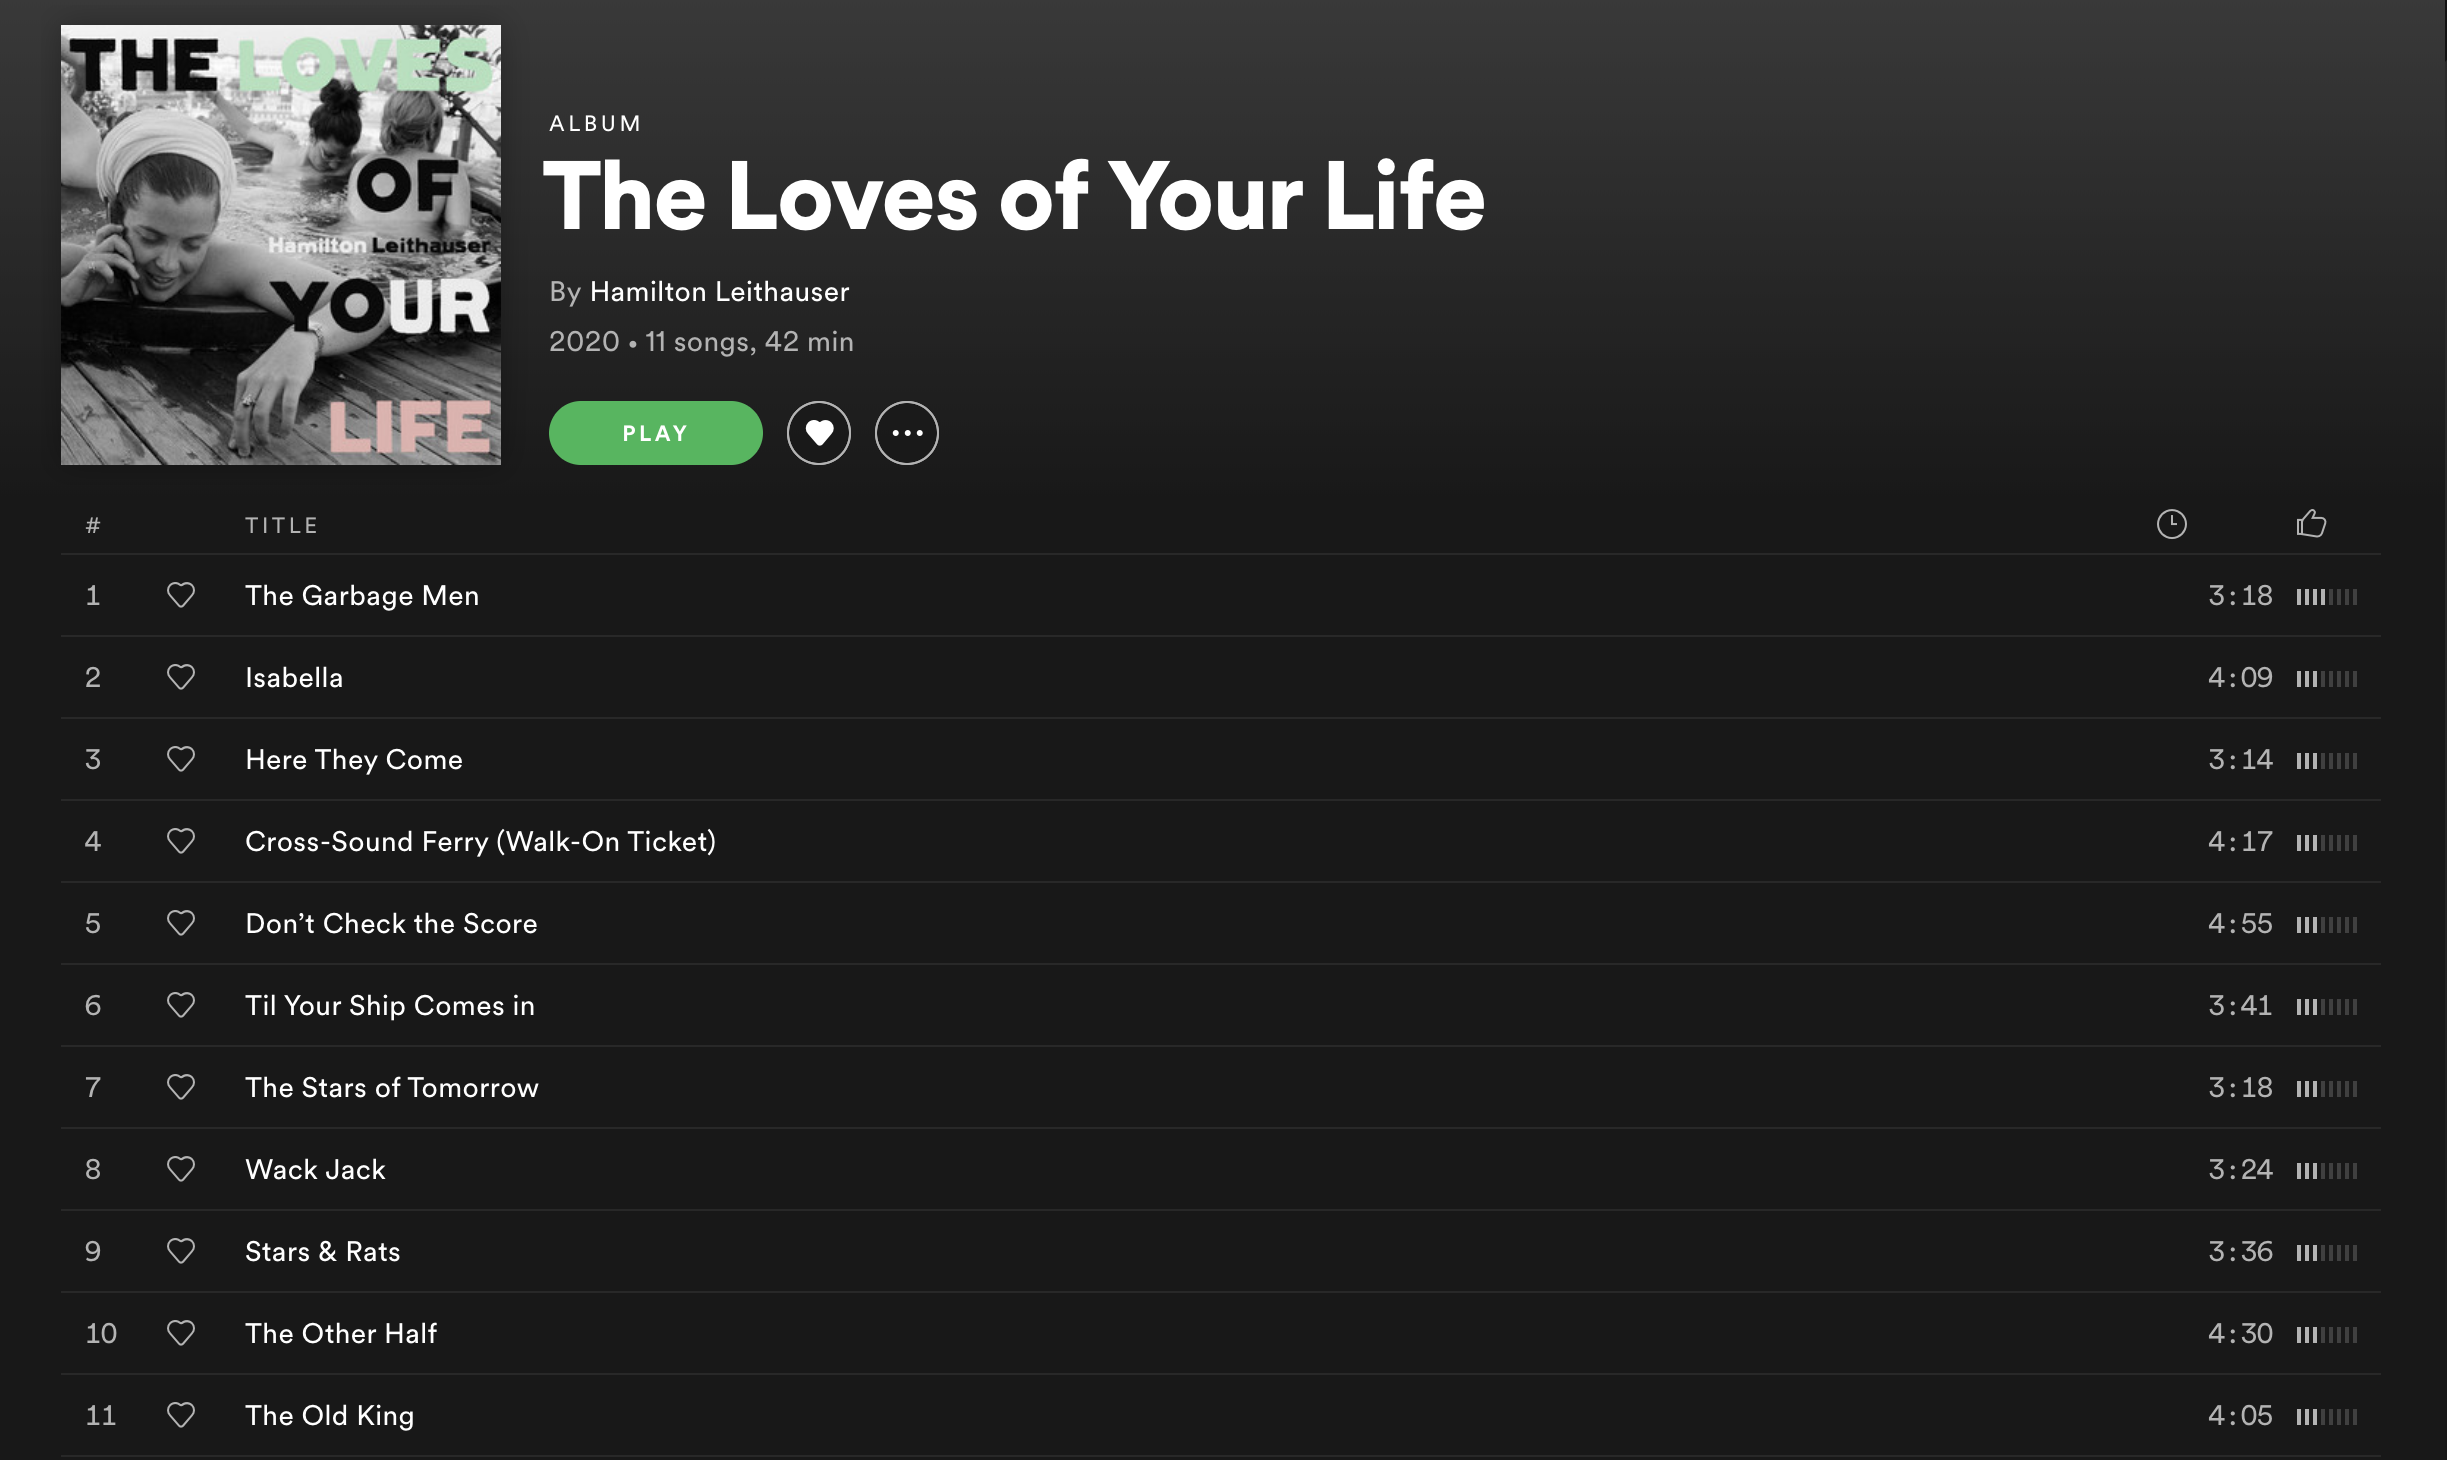

In [15]:
Image('After_Add_Album.PNG') 

So let's now add them:

In [16]:
leithauser_album = sp.album(leithauser_uri)
for track in leithauser_album['tracks'].get('items', []):
    sp.current_user_saved_tracks_add([track['uri']])

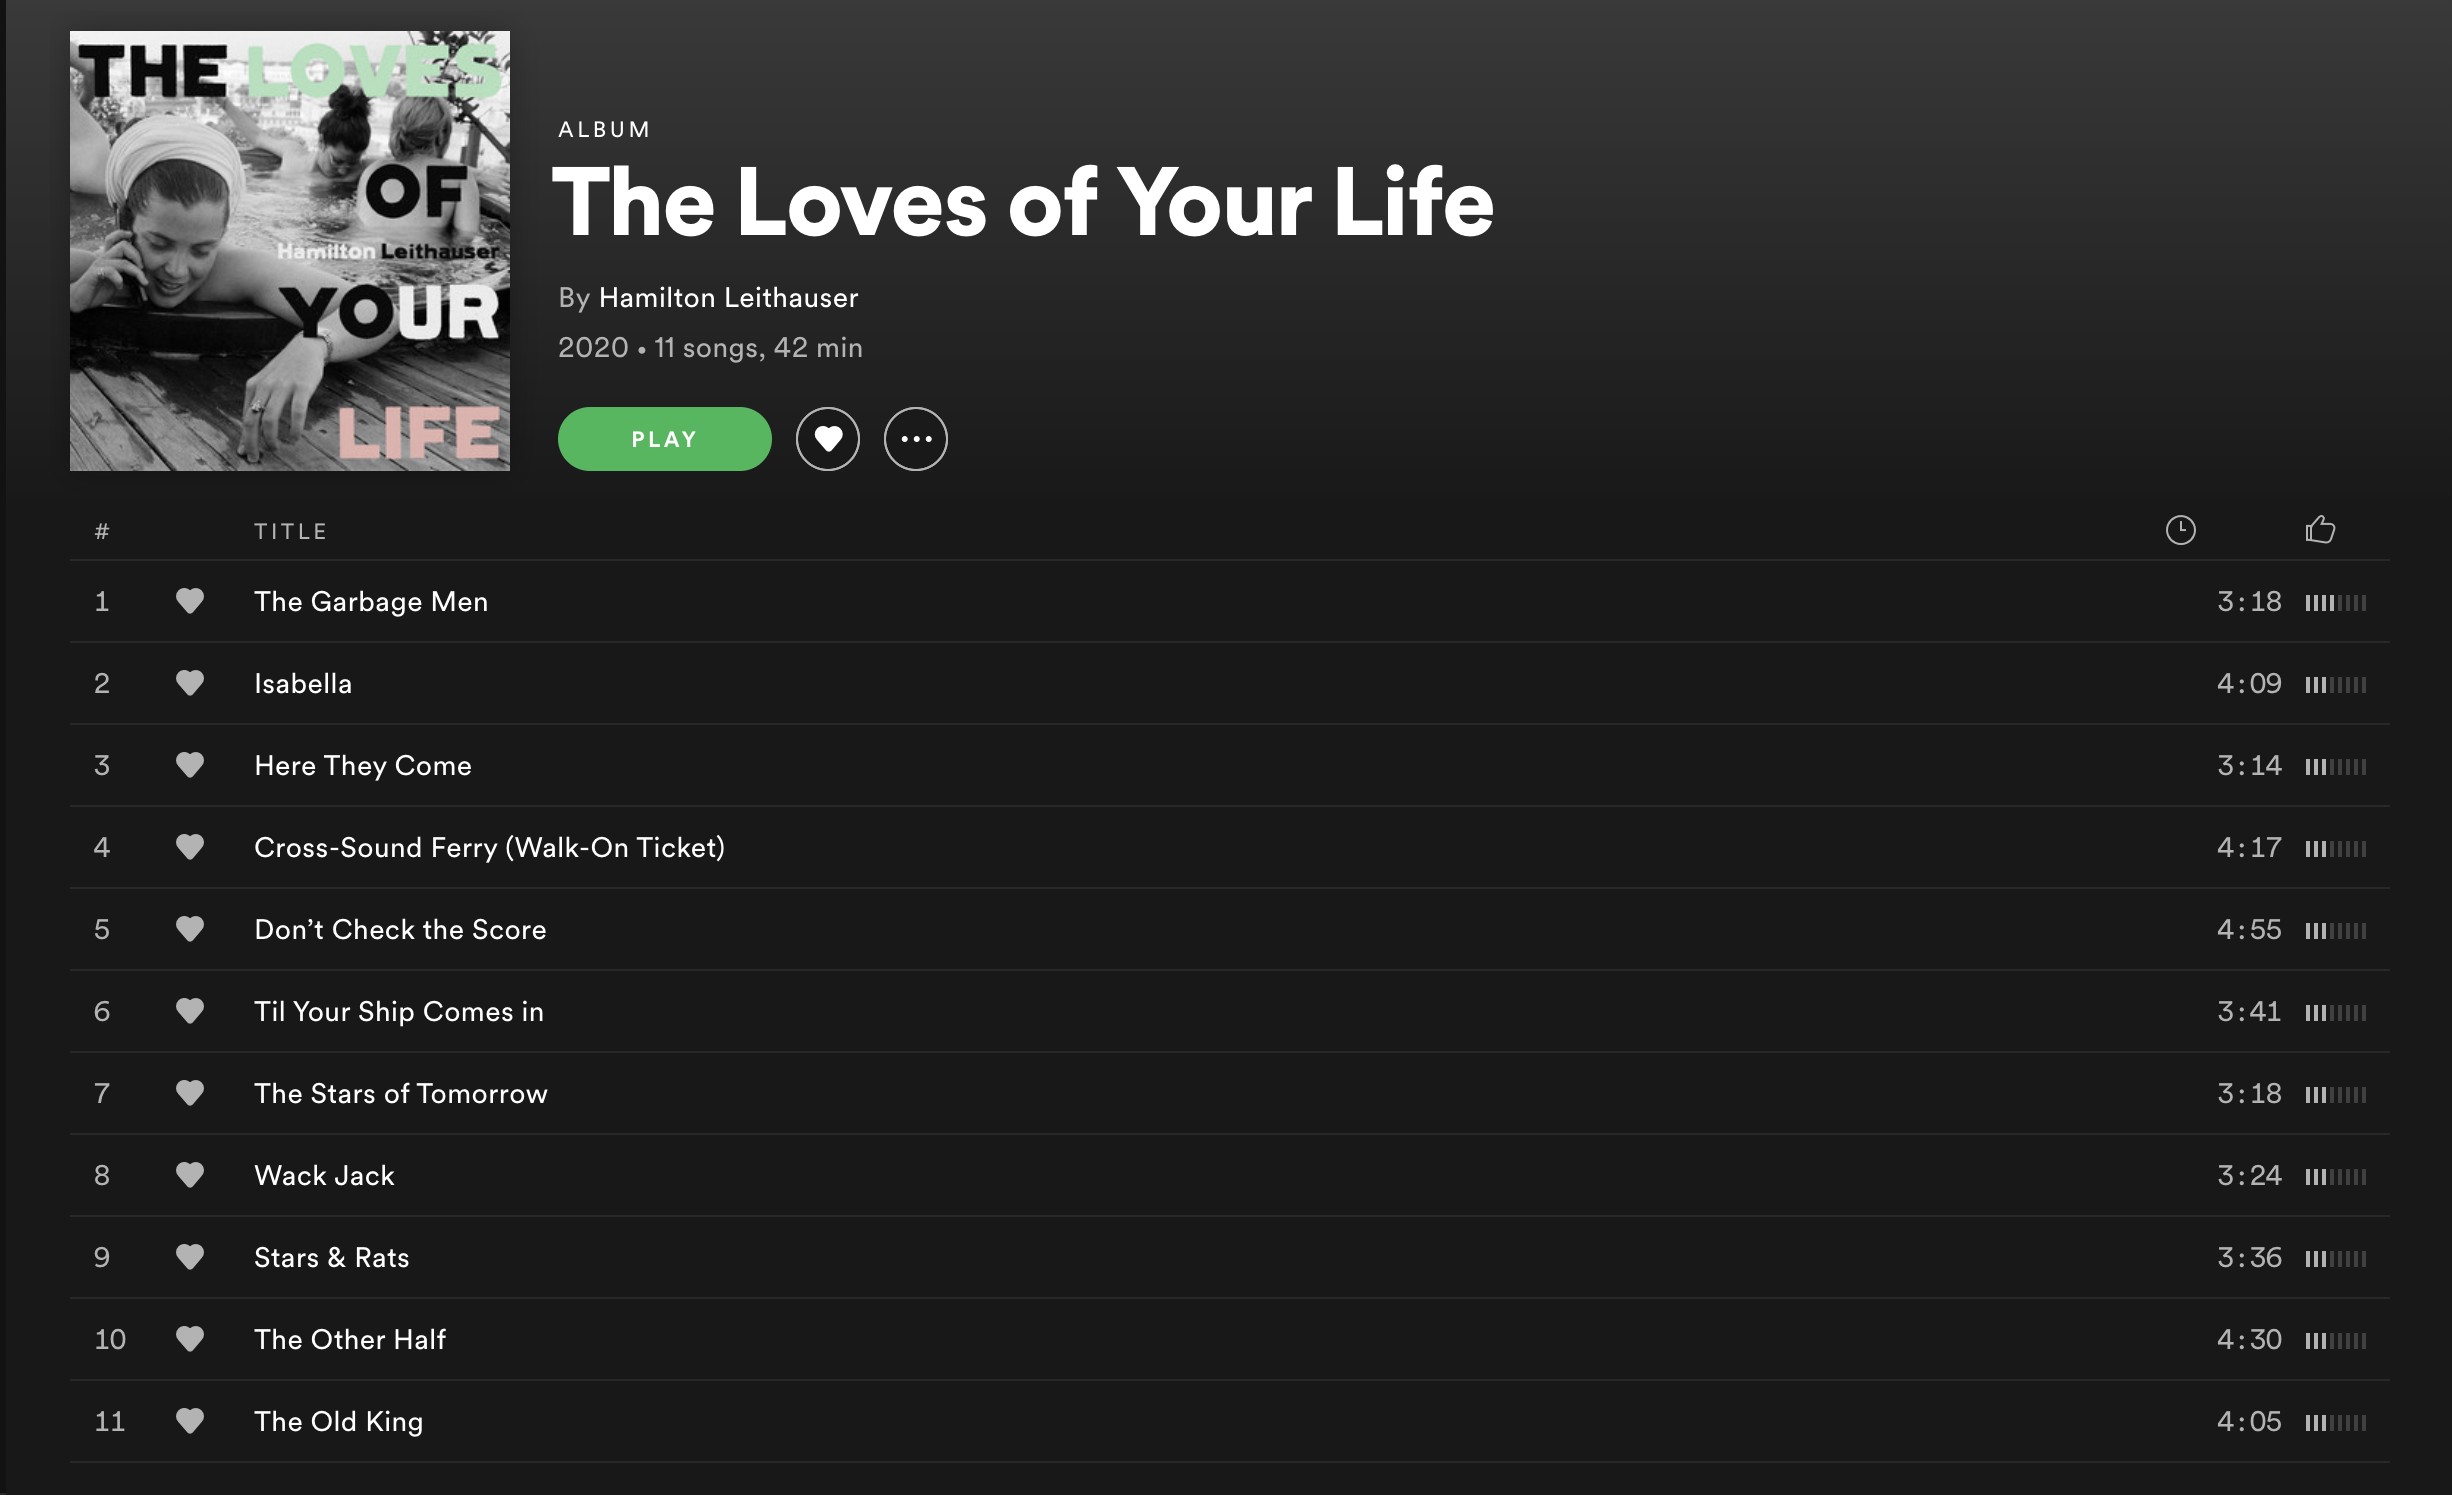

In [17]:
Image('After_Add_Tracks.PNG') 

Nice! Both album and all tracks have now been added to my library!